In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bering = pd.read_excel(filepath, sheet_name='Bering-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Bering)
fp.date_time(Bering)

,Extent,Date
0,320266.650,1979-01-01
1,541778.338,1979-02-01
2,638262.988,1979-03-01
3,423025.159,1979-04-01
4,215587.216,1979-05-01
...,...,...
488,317377.493,2023-05-01
489,39601.476,2023-06-01
490,16935.702,2023-07-01
491,1305.744,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bering['Extent'] = scaler.fit_transform(Bering['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 6
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bering['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((476, 12, 1), (476,))

In [8]:
X_train, y_train = X[:384], y[:384]
X_val, y_val = X[384:432], y[384:432]
X_test, y_test = X[432:], y[432:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bering_model_LT6/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
45/48 [===========================>..] - ETA: 0s - loss: 0.1540 - root_mean_squared_error: 0.3925

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 6s 86ms/step - loss: 0.1494 - root_mean_squared_error: 0.3865 - val_loss: 0.0460 - val_root_mean_squared_error: 0.2145
Epoch 2/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0942 - root_mean_squared_error: 0.3070

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 62ms/step - loss: 0.0916 - root_mean_squared_error: 0.3027 - val_loss: 0.0386 - val_root_mean_squared_error: 0.1964
Epoch 3/50
39/48 [=======================>......] - ETA: 0s - loss: 0.0713 - root_mean_squared_error: 0.2671

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 66ms/step - loss: 0.0715 - root_mean_squared_error: 0.2674 - val_loss: 0.0342 - val_root_mean_squared_error: 0.1849
Epoch 4/50
34/48 [====================>.........] - ETA: 0s - loss: 0.0692 - root_mean_squared_error: 0.2630

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 72ms/step - loss: 0.0622 - root_mean_squared_error: 0.2495 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1759
Epoch 5/50
42/48 [=========================>....] - ETA: 0s - loss: 0.0433 - root_mean_squared_error: 0.2080

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 58ms/step - loss: 0.0457 - root_mean_squared_error: 0.2137 - val_loss: 0.0295 - val_root_mean_squared_error: 0.1717
Epoch 6/50
48/48 [==============================] - ETA: 0s - loss: 0.0395 - root_mean_squared_error: 0.1988

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 56ms/step - loss: 0.0395 - root_mean_squared_error: 0.1988 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1684
Epoch 7/50
47/48 [============================>.] - ETA: 0s - loss: 0.0295 - root_mean_squared_error: 0.1719

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 69ms/step - loss: 0.0297 - root_mean_squared_error: 0.1724 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1677
Epoch 8/50
47/48 [============================>.] - ETA: 0s - loss: 0.0269 - root_mean_squared_error: 0.1639

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 62ms/step - loss: 0.0279 - root_mean_squared_error: 0.1669 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1665
Epoch 9/50
32/48 [===================>..........] - ETA: 0s - loss: 0.0222 - root_mean_squared_error: 0.1490

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 69ms/step - loss: 0.0241 - root_mean_squared_error: 0.1554 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1661
Epoch 10/50
43/48 [=========================>....] - ETA: 0s - loss: 0.0240 - root_mean_squared_error: 0.1548

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 72ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0273 - val_root_mean_squared_error: 0.1653
Epoch 11/50
47/48 [============================>.] - ETA: 0s - loss: 0.0213 - root_mean_squared_error: 0.1458

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 66ms/step - loss: 0.0213 - root_mean_squared_error: 0.1459 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1598
Epoch 12/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0184 - root_mean_squared_error: 0.1356 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1661
Epoch 13/50
41/48 [========================>.....] - ETA: 0s - loss: 0.0243 - root_mean_squared_error: 0.1559

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 66ms/step - loss: 0.0227 - root_mean_squared_error: 0.1507 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1509
Epoch 14/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0214 - root_mean_squared_error: 0.1464

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 60ms/step - loss: 0.0210 - root_mean_squared_error: 0.1447 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1499
Epoch 15/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0194 - root_mean_squared_error: 0.1394 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1584
Epoch 16/50
38/48 [======================>.......] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1355

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 67ms/step - loss: 0.0213 - root_mean_squared_error: 0.1460 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1416
Epoch 17/50
43/48 [=========================>....] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.1325

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 61ms/step - loss: 0.0177 - root_mean_squared_error: 0.1329 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1415
Epoch 18/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1669
Epoch 19/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0161 - root_mean_squared_error: 0.1271 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1481
Epoch 20/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0185 - root_mean_squared_error: 0.1360 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1741
Epoch 21/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0204 - root_mean_squared_error: 0.1427 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1599
Epoch 22/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0192 - root_mean_squared_error: 0.1384 - val_loss: 0.0253 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bering_model_LT6\assets


INFO:tensorflow:Assets written to: Bering_model_LT6\assets


48/48 [==============================] - 3s 66ms/step - loss: 0.0167 - root_mean_squared_error: 0.1293 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1346
Epoch 28/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0183 - root_mean_squared_error: 0.1351 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1643
Epoch 29/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0164 - root_mean_squared_error: 0.1281 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1698
Epoch 30/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0172 - root_mean_squared_error: 0.1311 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1548
Epoch 31/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0216 - root_mean_squared_error: 0.1471 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1559
Epoch 32/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0157 - root_mean_squared_error: 0.1251 - val_loss: 0.0277 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

0.9928616801897685 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

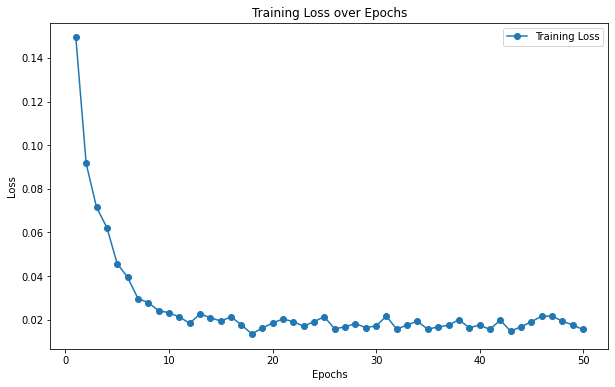

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

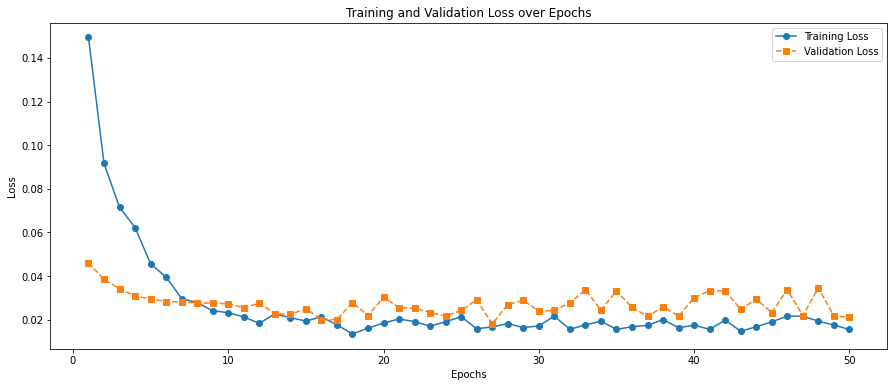

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bering_model_LT6/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.09189710761038443
MAE : 0.0686948561810323


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,277873.031250,49957.406
1,387771.593750,151973.751
2,450243.750000,466524.938
3,507257.906250,708542.184
4,464520.062500,652598.000
5,456057.312500,414216.785
6,274671.843750,236263.303
7,108787.640625,43422.368
8,-24739.732422,2161.744
9,3642.014648,944.181


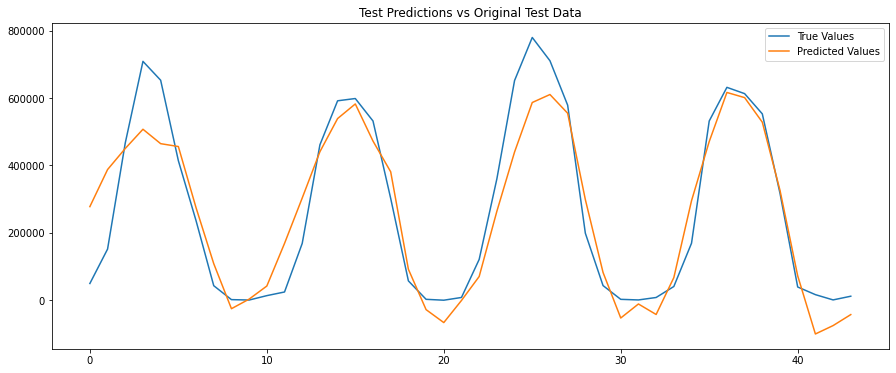

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

15/15 [==============================] - 0s 2ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

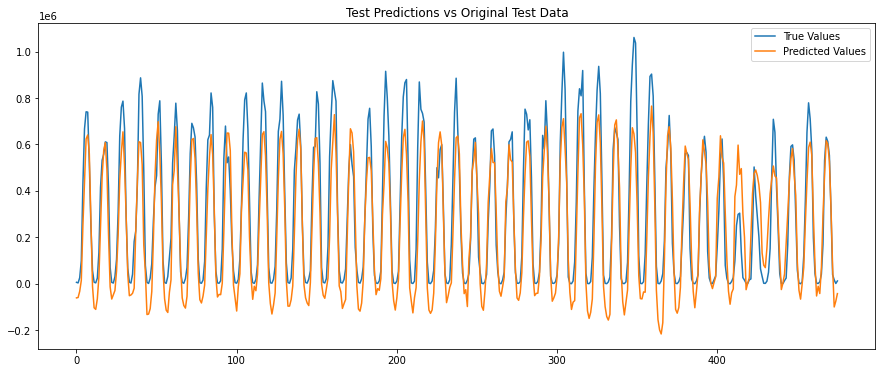

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()